## Objective
    -Practise date and time manipulation in python using relevant modules.
    
## Project Tasks
    - Estimate offsets from UTC and compare the obtained values. Store these values in a new column in the DataFrame.
    - Perform an analysis on the results and sort the timestamps from first to last.
    - Display the total and average amount of sales that occurred in each time zone.
    - Visualize your data and state any useful remarks.

In [226]:
# import relevant modules
import pandas as pd
import pytz
from datetime import date,datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # override pyplot parameters

In [196]:
# import csv file to python using pandas
sales = pd.read_csv('Sales-products-tz-mod.csv')
sales_data = sales.copy()
sales_data

,SaleID,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone
0,SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST
1,SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST
2,SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST
3,SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST
4,SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET
...,...,...,...,...,...,...,...,...
95,SaleID_96,Australia,Sports Store,Mountain Man Extreme,24.0,23/07/2019,12:30:03,Australia/West
96,SaleID_97,Australia,Department Store,Firefly Mapreader,1200.0,03/01/2019,01:39:14,Australia/West
97,SaleID_98,Australia,Discount Retailer,Polar Sun,32.0,14/02/2019,21:29:35,Australia/West
98,SaleID_99,Australia,Discount Retailer,Polar Ice,18.0,19/06/2020,11:16:19,Australia/West


In [197]:
# exploration
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             100 non-null    object 
 1   RetailerCountry    100 non-null    object 
 2   RetailerType       100 non-null    object 
 3   Product            100 non-null    object 
 4   Sales Revenue ($)  100 non-null    float64
 5   DateOfSale         100 non-null    object 
 6   TimeOfSale         100 non-null    object 
 7   TimeZone           100 non-null    object 
dtypes: float64(1), object(7)
memory usage: 6.4+ KB


In [198]:
#Check for any existing null values
sales_data.isna().sum()

SaleID               0
RetailerCountry      0
RetailerType         0
Product              0
Sales Revenue ($)    0
DateOfSale           0
TimeOfSale           0
TimeZone             0
dtype: int64

In [199]:
#set index to SaleID column
sales_data.set_index('SaleID',inplace=True)

In [200]:
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),DateOfSale,TimeOfSale,TimeZone
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,06/01/2020,23:20:56,EST
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,05/02/2020,17:27:08,EST
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,30/10/2020,09:04:43,EST
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,13/11/2020,04:25:06,EST
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,06/12/2020,11:15:47,CET


In [201]:
# Combine the date and time values from the data set to give an object with a datetime style
new_column = sales_data['DateOfSale']+" "+sales_data['TimeOfSale']
new_column.head()

SaleID
SaleID_1    06/01/2020 23:20:56
SaleID_2    05/02/2020 17:27:08
SaleID_3    30/10/2020 09:04:43
SaleID_4    13/11/2020 04:25:06
SaleID_5    06/12/2020 11:15:47
dtype: object

In [202]:
# convert into datetime format for easier manipulation
new_column_pandas = pd.to_datetime(new_column)
new_column_pandas.head()

SaleID
SaleID_1   2020-06-01 23:20:56
SaleID_2   2020-05-02 17:27:08
SaleID_3   2020-10-30 09:04:43
SaleID_4   2020-11-13 04:25:06
SaleID_5   2020-06-12 11:15:47
dtype: datetime64[ns]

In [203]:
# create new column called moment of sale
sales_data["MomentOfSale"] = new_column_pandas

# drop columns time of sale and date of sale
sales_data = sales_data.drop(['TimeOfSale','DateOfSale'],axis=1)
sales_data.head()

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MomentOfSale
SaleID,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-01 23:20:56
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 17:27:08
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 09:04:43
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 04:25:06
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 11:15:47


In [204]:
#Find the unique timezones in the dataset
sales_data_timezones = sales_data['TimeZone'].unique()
sales_data_timezones

array(['EST', 'CET', 'GMT', 'EET', 'SGT', 'Australia/West'], dtype=object)

In [205]:
#Get all timezones as represented in the Olson library by using the pytz module
all_timezones = pytz.all_timezones

In [206]:
#Check if the timezones in the dataset match the correct representation
check_timezones = [print(True) if timezone in all_timezones else print(False) for timezone in sales_data_timezones]

True
True
True
True
False
True


In [207]:
sales_data_timezones[check_timezones]

C:\Users\DC\AppData\Local\Temp\ipykernel_26944\3617248455.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sales_data_timezones[check_timezones]


array([[[[[[['EST', 'CET', 'GMT', 'EET', 'SGT', 'Australia/West']]]]]]],
      dtype=object)

In [208]:
# change the unmatching timezone 'SGT' to the right standard
sales_data['TimeZone'] = sales_data['TimeZone'].replace('SGT','Singapore')
(sales_data['TimeZone']=='Singapore').sum()

8

### Estimate offsets from UTC and compare the obtained values. Store these values in a new column in the DataFrame.

In [209]:
# create a list of timestamps and their respective timezones according to the data set
timestamp_and_zone =[]
for i in range(len(sales_data['TimeZone'])):
    t=sales_data["MomentOfSale"].iloc[i].tz_localize((sales_data['TimeZone'].iloc[i]),
    ambiguous='raise',nonexistent='raise')
    timestamp_and_zone.append(t)

In [210]:
sales_data['MomentOfSale'] = timestamp_and_zone

In [211]:
# extract utc offset from timestamp
# method one.Convert timestamp to string and obtain the offset using appropriate formatting
offset_list = []
[offset_list.append(int(timestamp_and_zone[i].strftime("%z"))/100) for i in range(len(timestamp_and_zone))]
offset_list
sales_data["Offset_UTC"] = offset_list

In [212]:
# method two.Extract date,time or utc offset using relevant methods
offset_UTC=[]
for i in range(len(timestamp_and_zone)):
    v=timestamp_and_zone[i].utcoffset().total_seconds()/3600 # dividing by 3600s  gives us the number of hours ahead or behind utc
    offset_UTC.append(v)

In [213]:
# create a new column for the utc offset values
sales_data["Offset_UTC"]=offset_UTC
sales_data["Offset_UTC"]

SaleID
SaleID_1     -5.0
SaleID_2     -5.0
SaleID_3     -5.0
SaleID_4     -5.0
SaleID_5      2.0
             ... 
SaleID_96     8.0
SaleID_97     8.0
SaleID_98     8.0
SaleID_99     8.0
SaleID_100    8.0
Name: Offset_UTC, Length: 100, dtype: float64

In [221]:
sales_data

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MomentOfSale,Offset_UTC
SaleID,,,,,,,
SaleID_1,United States,Outdoors Shop,TrailChef Deluxe Cook Set,200.0,EST,2020-06-02 04:20:56+00:00,-5.0
SaleID_2,United States,Outdoors Shop,TrailChef Double Flame,7.0,EST,2020-05-02 22:27:08+00:00,-5.0
SaleID_3,United States,Outdoors Shop,Star Dome,20.0,EST,2020-10-30 14:04:43+00:00,-5.0
SaleID_4,United States,Outdoors Shop,Star Gazer 2,40.0,EST,2020-11-13 09:25:06+00:00,-5.0
SaleID_5,Italy,Outdoors Shop,Canyon Mule Carryall,150.5,CET,2020-06-12 09:15:47+00:00,2.0
...,...,...,...,...,...,...,...
SaleID_96,Australia,Sports Store,Mountain Man Extreme,24.0,Australia/West,2019-07-23 04:30:03+00:00,8.0
SaleID_97,Australia,Department Store,Firefly Mapreader,1200.0,Australia/West,2019-02-28 17:39:14+00:00,8.0
SaleID_98,Australia,Discount Retailer,Polar Sun,32.0,Australia/West,2019-02-14 13:29:35+00:00,8.0


#### Perform an analysis on the results and sort the timestamps from first to last

In [216]:
# represent all moments of sale as UTC before sorting 
utc_column =[]
for i in range(len(sales_data['MomentOfSale'])):
    t=pd.to_datetime(sales_data['MomentOfSale'].iloc[i]).tz_convert(pytz.UTC)
    utc_column.append(t)
utc_column[:5] 

[Timestamp('2020-06-02 04:20:56+0000', tz='UTC'),
 Timestamp('2020-05-02 22:27:08+0000', tz='UTC'),
 Timestamp('2020-10-30 14:04:43+0000', tz='UTC'),
 Timestamp('2020-11-13 09:25:06+0000', tz='UTC'),
 Timestamp('2020-06-12 09:15:47+0000', tz='UTC')]

In [222]:
sales_data['MomentOfSale'] = utc_column
sales_data.sort_values("MomentOfSale")

,RetailerCountry,RetailerType,Product,Sales Revenue ($),TimeZone,MomentOfSale,Offset_UTC
SaleID,,,,,,,
SaleID_60,Canada,Outdoors Shop,Polar Sun,32.00,EST,2019-01-03 04:10:36+00:00,-5.0
SaleID_33,Canada,Outdoors Shop,Venue,110.00,EST,2019-01-16 18:33:16+00:00,-5.0
SaleID_87,Australia,Sports Store,Star Peg,37.85,Australia/West,2019-01-18 20:29:44+00:00,8.0
SaleID_18,Singapore,Outdoors Shop,Granite Pulley,19.00,Singapore,2019-01-31 17:32:09+00:00,8.0
SaleID_98,Australia,Discount Retailer,Polar Sun,32.00,Australia/West,2019-02-14 13:29:35+00:00,8.0
...,...,...,...,...,...,...,...
SaleID_67,United Kingdom,Sports Store,Polar Sports,85.00,GMT,2020-12-02 03:16:33+00:00,0.0
SaleID_80,Austria,Warehouse Store,EverGlow Single,24.90,CET,2020-12-05 04:30:58+00:00,1.0
SaleID_35,Canada,Outdoors Shop,Legend,641.00,EST,2020-12-21 01:25:08+00:00,-5.0


In [220]:
# Display the offset per timezone
sales_data.groupby(['RetailerCountry','TimeZone','Offset_UTC']).count()
# observe that a timezone can have more than one UTC offset eg CET due to the daylight time saving 
# specs for each region in a timezone.

RetailerType  Product  \
RetailerCountry TimeZone       Offset_UTC                          
Australia       Australia/West  8.0                  17       17   
Austria         CET             1.0                   2        2   
                                2.0                   3        3   
Canada          EST            -5.0                  32       32   
China           EET             2.0                   2        2   
                                3.0                   4        4   
Germany         CET             1.0                   1        1   
                                2.0                   1        1   
Italy           CET             2.0                   4        4   
Mexico          EET             2.0                   2        2   
                EST            -5.0                   4        4   
Singapore       Singapore       8.0                   8        8   
Switzerland     CET             1.0                   3        3   
                                2.0                   2        2   
United Kingdom  GMT             0.0                  11       11   
United States   EST            -5.0                   4        4   

                                           Sales Revenue ($)  MomentOfSale  
RetailerCountry TimeZone       Offset_UTC                                   
Australia       Australia/West  8.0                       17            17  
Austria         CET             1.0                        2             2  
                                2.0                        3             3  
Canada          EST            -5.0                       32            32  
China           EET             2.0                        2             2  
                                3.0                        4             4  
Germany         CET             1.0                        1             1  
                                2.0                        1             1  
Italy           CET             2.0                        4             4  
Mexico          EET             2.0                        2             2  
                EST            -5.0                        4             4  
Singapore       Singapore       8.0                        8             8  
Switzerland     CET             1.0                        3             3  
                                2.0                        2             2  
United Kingdom  GMT             0.0                       11            11  
United States   EST            -5.0                        4             4

### Display the total and average amount of sales that occurred in each time zone

In [162]:
# average amount of sales per country
sales_data.groupby(['RetailerCountry','TimeZone']).mean()

Sales Revenue ($)  Offset_UTC
RetailerCountry TimeZone                                     
Australia       Australia/West         273.105882    8.000000
Austria         CET                    798.610000    1.600000
Canada          EST                    255.565625   -5.000000
China           EET                    672.166667    2.666667
Germany         CET                     21.000000    1.500000
Italy           CET                    430.122500    2.000000
Mexico          EET                    330.250000    2.000000
                EST                    192.580000   -5.000000
Singapore       Singapore               27.688750    8.000000
Switzerland     CET                    179.164000    1.400000
United Kingdom  GMT                    115.137273    0.000000
United States   EST                     66.750000   -5.000000

In [230]:
# Total amount of sales per time zone
sales_per_timezone = sales_data.groupby(['TimeZone']).count()
sales_per_timezone
# Notice that Singapore and the EET time zone have the same number of sales but with the EET having about 22 times
# the mean sales revenue 

,RetailerCountry,RetailerType,Product,Sales Revenue ($),MomentOfSale,Offset_UTC
TimeZone,,,,,,
Australia/West,17,17,17,17,17,17
CET,16,16,16,16,16,16
EET,8,8,8,8,8,8
EST,40,40,40,40,40,40
GMT,11,11,11,11,11,11
Singapore,8,8,8,8,8,8


In [231]:
sales_per_timezone.index

Index(['Australia/West', 'CET', 'EET', 'EST', 'GMT', 'Singapore'], dtype='object', name='TimeZone')

[]

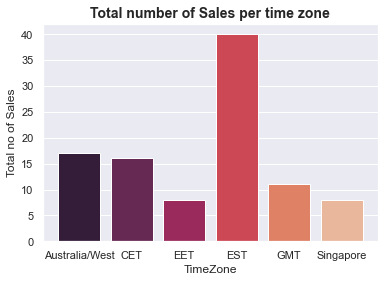

In [246]:
# Visualize your data and state any useful remarks
# bar chat for total number of sales per time zone
sns.barplot(x=sales_per_timezone.index,y=sales_per_timezone['RetailerType'],data=sales_per_timezone,palette='rocket')
plt.ylabel('Total no of Sales')
plt.title('Total number of Sales per time zone',fontsize=14,fontweight = 'bold')
plt.plot(grid=False)



AttributeError: 'Rectangle' object has no property 'grid'

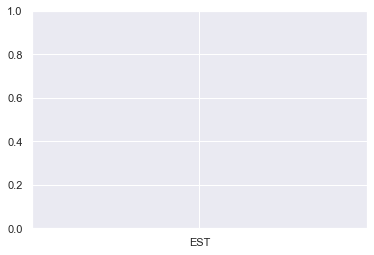

In [247]:
plt.bar(sales_data['TimeZone'],height = sales_data['Sales Revenue ($)'],
       data = sales_data,grid=False)

<AxesSubplot:xlabel='MomentOfSale', ylabel='Sales Revenue ($)'>

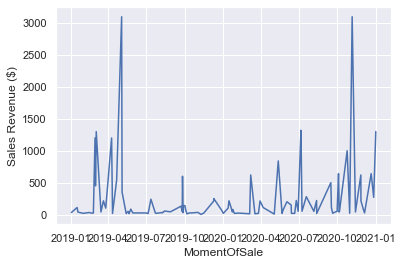

In [248]:
# display the trend of sales revenue
sns.lineplot(x=sales_data['MomentOfSale'],y=sales_data['Sales Revenue ($)'])

In [ ]:
# display sales revenue per timezone
# find any relationship between retailer type and sales revenue